<a href="https://colab.research.google.com/github/gardim1/GS-python/blob/main/GSProjetoFinalFinal7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando as bibliotecas


In [ ]:
!pip install roboflow
!pip install inference_sdk
!pip install ultralytics==8.0.196



# Importando as bibliotecas e Configurando a API Roboflow

In [ ]:
from roboflow import Roboflow
from inference_sdk import InferenceHTTPClient
import cv2
from google.colab.patches import cv2_imshow

# Configurar a API do Roboflow
rf = Roboflow(api_key="7EfDjY4OfBZm6JrXP8z4")
project = rf.workspace("projetogs").project("lilixo")
version = project.version(2)


# Baixar o dataset e configurar o modelo
dataset = version.download("yolov8")

# Configurar o cliente de inferência
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="7EfDjY4OfBZm6JrXP8z4"
)


loading Roboflow workspace...
loading Roboflow project...


# Carregar a imagem no Colab

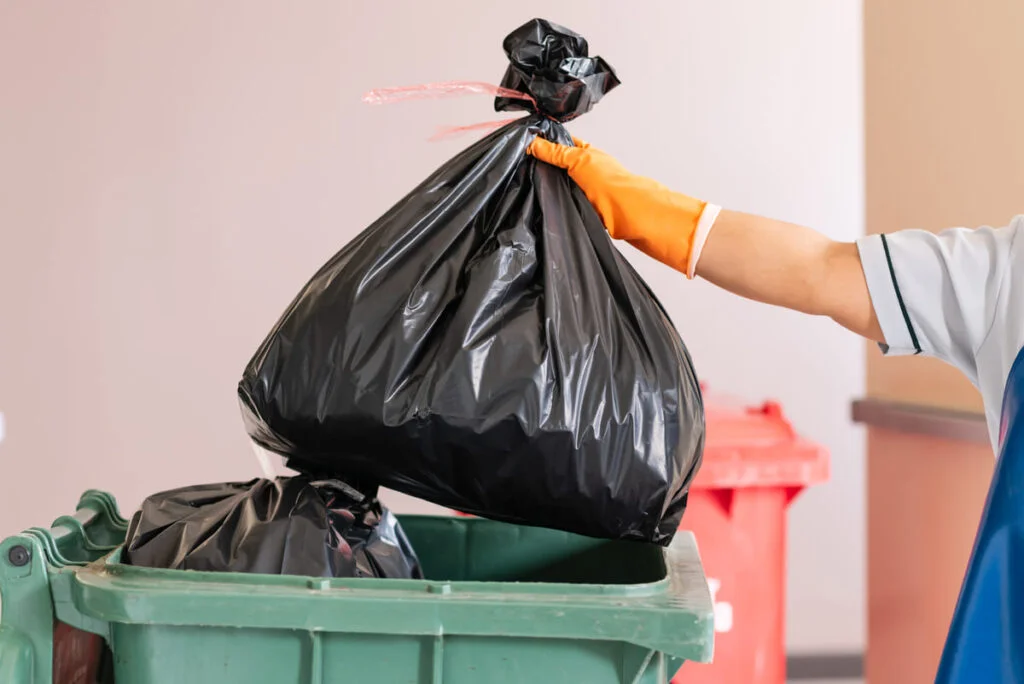

In [ ]:
# Carregar a imagem
img_lixo = cv2.imread('/content/lixo_teste.webp')
cv2_imshow(img_lixo)




# Fazer inferencia usando o modelo treinado

In [ ]:
# define a inferencia como result
result = CLIENT.infer(
    img_lixo,
    model_id="lilixo/2"
)


In [ ]:
print(result)

{'time': 0.09888654300004873, 'image': {'width': 1024, 'height': 684}, 'predictions': [{'x': 470.5, 'y': 283.0, 'width': 477.0, 'height': 532.0, 'confidence': 0.9993374943733215, 'class': 'Lixo', 'class_id': 0, 'detection_id': '10e53c7b-daef-41ac-9693-8facef848ebd'}]}


# Deixando o Output com uma resposta melhor

In [ ]:
if result['predictions']:
    classe = result['predictions'][0]['class']
    confianca = result['predictions'][0]['confidence']
    print(f"Classe: {classe} - Confiança: {confianca:.2f}%")
else:
    print("Nenhuma predição encontrada.")

Classe: Lixo - Confiança: 1.00%
